In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [24]:
#Now let's deal with timelag, starting from our csv without nulls on income
data = pd.read_csv('unit_4_income_knn.csv')
data

state pvastate   dob mdmaud recp3 gender domain  income homeownr   hv1  \
0        IL           3712   XXXX            F     T2       3            479   
1        CA           5202   XXXX            M     S1       6        H  5468   
2        NC              0   XXXX            M     R2       3        U   497   
3        CA           2801   XXXX            F     R2       1        U  1000   
4        FL           2001   XXXX     X      F     S2       3        H   576   
...     ...      ...   ...    ...   ...    ...    ...     ...      ...   ...   
90564    FL           4803   XXXX            F     S2       6        H   733   
90565    AK              0   XXXX            M     C2       5            988   
90566    TX           5001   XXXX            M     C1       7        H  1679   
90567    MI           3801   XXXX     X      M     C3       3            376   
90568    NC           1801   C1CM            F     C1       5        U   938   

        hv2  hv3  hv4   ic1   ic2   ic3   ic4    ic5 veterans  numprom  \
0       635    3    2   307   318   349   378  12883                74   
1      5218   12   10  1088  1096  1026  1037  36175                32   
2       546    2    1   251   292   292   340  11576                63   
3      1263    2    1   386   388   396   423  15130                66   
4       594    4    3   240   250   293   321   9836               113   
...     ...  ...  ...   ...   ...   ...   ...    ...      ...      ...   
90564   875    4    3   285   288   333   334  11390                59   
90565  1025    6    6   433   481   499   535  18807                14   
90566  1723    3    3   806   836   802   849  26538                10   
90567   377    4    3   263   264   319   345  12178                33   
90568  1049    5    5   451   474   499   519  16699               139   

       cardprom  cardpm12  numprm12  maxadate rfa_2  ngiftall  timelag  \
0            27         6        14      9702   L4E        31      4.0   
1            12         6        13      9702   L2G         3     18.0   
2            26         6        14      9702   L4E        27     12.0   
3            27         6        14      9702   L4E        16      9.0   
4            43        10        25      9702   L2F        37     14.0   
...         ...       ...       ...       ...   ...       ...      ...   
90564        23         5        12      9702   L4D        24      3.0   
90565         6         5        12      9702   L1G         1      NaN   
90566         4         3         8      9702   L1F         1      NaN   
90567        14         7        17      9702   L3E         7      3.0   
90568        32         6        35      9702   L1G        39      6.0   

         avggift  
0       7.741935  
1      15.666667  
2       7.481481  
3       6.812500  
4       6.864865  
...          ...  
90564   3.375000  
90565  25.000000  
90566  20.000000  
90567   8.285714  
90568  96.794872  

[90569 rows x 28 columns]

In [5]:
data.isna().sum()

state          0
pvastate       0
dob            0
mdmaud         0
recp3          0
gender         0
domain         0
income         0
homeownr       0
hv1            0
hv2            0
hv3            0
hv4            0
ic1            0
ic2            0
ic3            0
ic4            0
ic5            0
veterans       0
numprom        0
cardprom       0
cardpm12       0
numprm12       0
maxadate       0
rfa_2          0
ngiftall       0
timelag     9653
avggift        0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

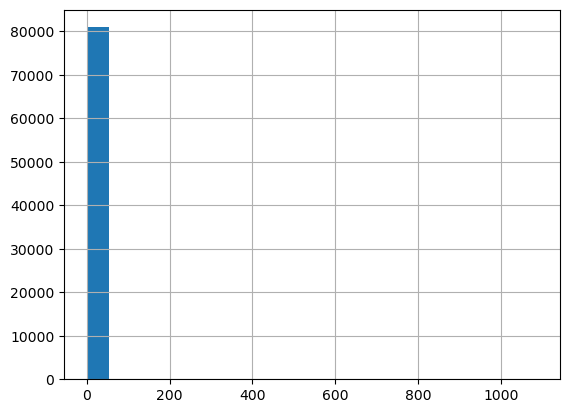

In [6]:
data.timelag.hist(bins=20)
plt.show

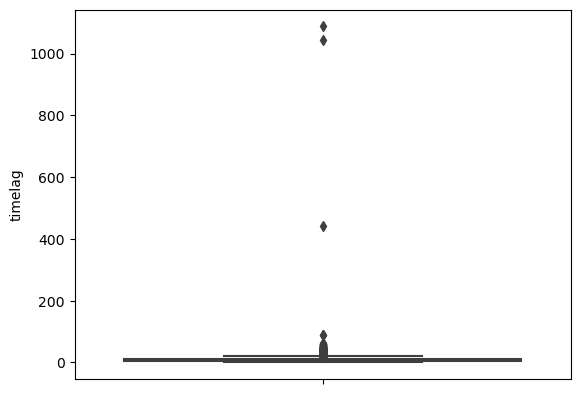

In [7]:
sns.boxplot(y=data['timelag'])
plt.show()

In [14]:
data[data['timelag']>100]

state pvastate   dob mdmaud recp3 gender domain  income homeownr  hv1  \
78984    IA              0   XXXX     X      M     R2       1        U  544   
81774    IL           1001   XXXX            F     C3       2        H  437   
89045    MI           1907   XXXX            M     C2       5        H  389   

       hv2  hv3  hv4  ic1  ic2  ic3  ic4    ic5 veterans  numprom  cardprom  \
78984  589    2    1  314  390  371  421  14581               100        39   
81774  449    3    3  174  288  256  300  10191                73        27   
89045  399    3    3  349  379  371  411  12908               119        29   

       cardpm12  numprm12  maxadate rfa_2  ngiftall  timelag    avggift  
78984        10        25      9702   L1F        26   1044.0  12.038462  
81774         5        11      9702   L1F        26    442.0   9.576923  
89045         9        36      9702   L3G        48   1088.0  18.083333

In [25]:
data = data[data['timelag']<400]
data.shape

(80913, 28)

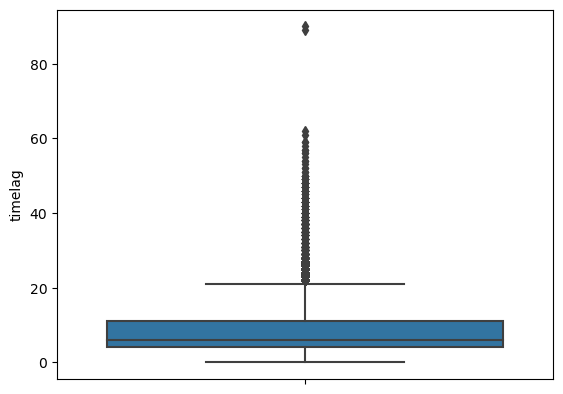

In [26]:
sns.boxplot(y=data['timelag'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

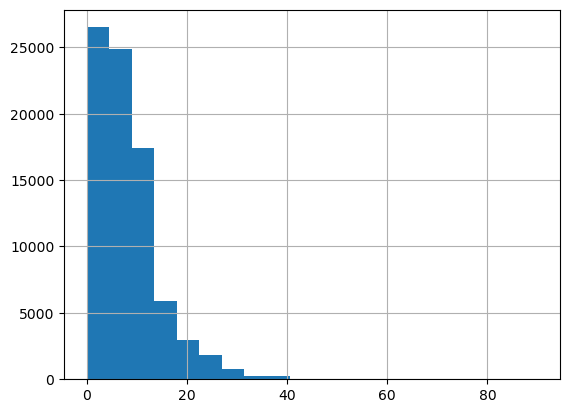

In [28]:
data.timelag.hist(bins=20)
plt.show

In [29]:
def log_transform_clean(x):
    if x!=0:
        return np.log(x)
    else:
        return np.NAN

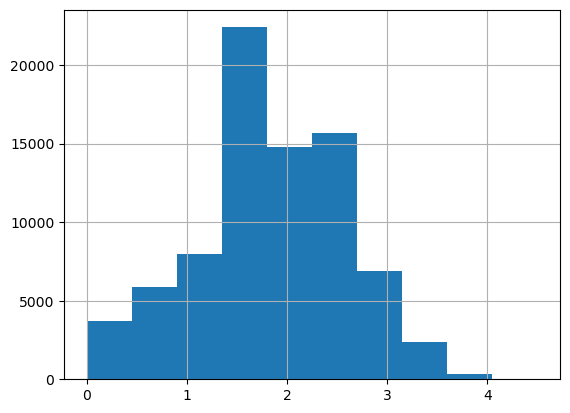

In [30]:
new_log = map(log_transform_clean, data['timelag'])
new_log = pd.Series(new_log)
new_log.hist()
plt.show()

In [34]:
def sqrt_transform(x):
    if x==0:
        return np.nan
    else:
        return np.sqrt(x)

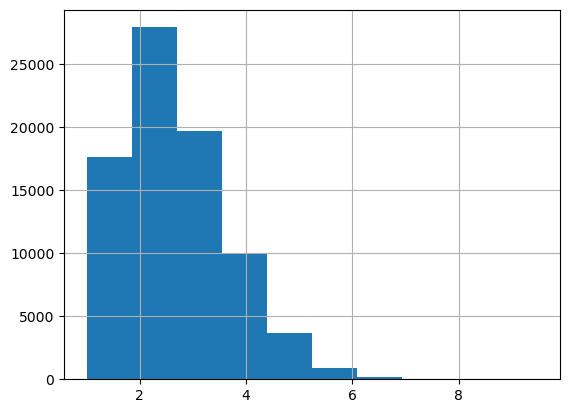

In [35]:
new_sqrt = map(sqrt_transform, data['timelag'])
new_sqrt = pd.Series(new_sqrt)
new_sqrt.hist()
plt.show()

In [36]:
from sklearn.preprocessing import PowerTransformer

In [37]:
transformer = PowerTransformer(method='yeo-johnson')

In [44]:
df_timelag = pd.DataFrame(data.timelag, columns=['timelag'])
df_timelag

timelag
0          4.0
1         18.0
2         12.0
3          9.0
4         14.0
...        ...
90562      3.0
90563     19.0
90564      3.0
90567      3.0
90568      6.0

[80913 rows x 1 columns]

In [46]:
new_yeo = transformer.fit_transform(df_timelag)

In [49]:
new_yeo

0
0     -0.599324
1      1.466314
2      0.851309
3      0.439333
4      1.080530
...         ...
80908 -0.918918
80909  1.551214
80910 -0.918918
80911 -0.918918
80912 -0.103965

[80913 rows x 1 columns]

array([[<Axes: title={'center': '0'}>]], dtype=object)

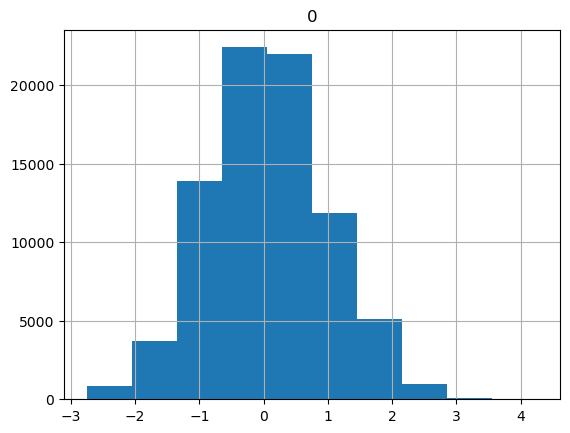

In [48]:
new_yeo = pd.DataFrame(new_yeo)
new_yeo.hist()

In [51]:
data.timelag = new_yeo[0]

<Axes: >

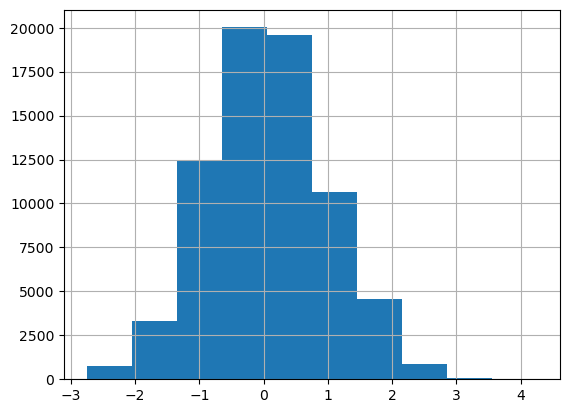

In [52]:
data.timelag.hist()

In [53]:
data.timelag.isna().sum()

8617